# Exercise sheet Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deerlab as dl

/Users/hugo/.pyenv/versions/3.11.0/envs/deerlab_dev_311/lib/python3.11/site-packages/tqdm-4.65.0-py3.11.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exercise 1: Multi-pathway 4-pulse DEER

**1.a: Loading data**
- Please load data from the "../data/Exercise1.DTA"
- Please correct the phase
- Please normalise the data
- Please correct for deadtime (Here it was 300ns)

In [2]:
t, V = dl.deerload('../data/Exercise1.DTA')
Vexp = dl.correctphase(V)
Vexp = Vexp/np.max(Vexp)

t = t-t[0]
t = t + 0.28

**1.b: Building the model**
- Define a r axis.
- Please create a 4pdeer experiment, with the correct tau values
- Use this experiment to build a non-parametric model
- Please print this model

In [3]:
r = np.linspace(1.5,6,50)   # time axis, µs
experiment = dl.ex_4pdeer(tau1=0.4,tau2=4.2, pathways=[1,2,3])
Vmodel = dl.dipolarmodel(t,r, experiment=experiment)
print(Vmodel)

Description: 4-pulse DEER dipolar signal model
Signature: (lam1, reftime1, lam2, reftime2, lam3, reftime3, conc, P)
Constants: []
Parameter Table: 
========== ======== ======= ======= ======== ======== ====== ====================================== 
 Name       Lower    Start   Upper    Type    Frozen   Unit   Description                           
========== ======== ======= ======= ======== ======== ====== ====================================== 
 lam1           0     0.01       1   nonlin     No            Amplitude of pathway #1               
 reftime1   0.352      0.4   0.448   nonlin     No      μs    Refocusing time of pathway #1         
 lam2           0     0.01       1   nonlin     No            Amplitude of pathway #2               
 reftime2    4.55      4.6    4.65   nonlin     No      μs    Refocusing time of pathway #2         
 lam3           0     0.01       1   nonlin     No            Amplitude of pathway #3               
 reftime3   -0.048       0   0.048   nonlin 

**1.c: Fitting**
- Please fit your data
    - If you are using Binder please add these aditonal fitting arguments: `ftol=1e3` 
- Print your results
- Plot the time domain, using the built in method

Goodness-of-fit: 
========= ============= ============= ===================== ======= 
 Dataset   Noise level   Reduced 𝛘2    Residual autocorr.    RMSD   
========= ============= ============= ===================== ======= 
   #1         0.009         1.073             0.024          0.010  
========= ============= ============= ===================== ======= 
Model hyperparameters: 
 Regularization parameter  
          0.466            
Model parameters: 
=========== ======== ========================= ====== ====================================== 
 Parameter   Value    95%-Confidence interval   Unit   Description                           
=========== ======== ========================= ====== ====================================== 
 lam1        0.367    (0.315,0.418)                    Amplitude of pathway #1               
 reftime1    0.418    (0.393,0.444)              μs    Refocusing time of pathway #1         
 lam2        0.072    (0.052,0.093)                    Amplitude of 

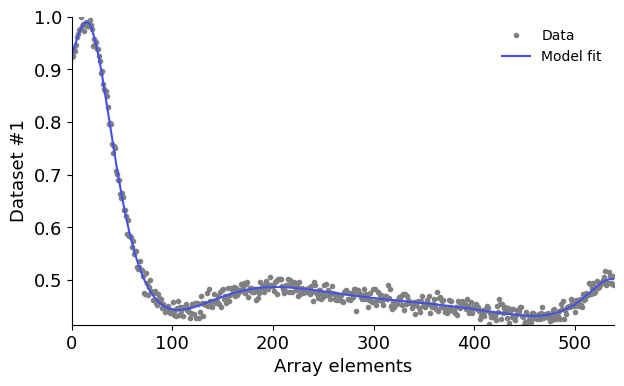

In [4]:
results = dl.fit(Vmodel, Vexp)
print(results)
results.plot();

**1.d: Extracting the distance distributions**
- Create a variable ieth the distance distribution, and it 95% confidence interval
- Use the `diststats` function to get distance infomation

In [5]:
Vfit = results.model   # Fitted signal
P = results.P
P95 = results.PUncert.ci(95)    # 95% confidence interval
dl.diststats(r,P,results.PUncert,True);

-------------------------------------------------
Distribution Statistics
-------------------------------------------------
Range                    1.50-6.00 nm
Integral                 1.00
-------------------------------------------------
Location
-------------------------------------------------
Range                    1.50-6.00 nm
Mean                     3.96 (3.94,3.98) nm
Median                   3.97 (3.95,3.99) nm
Interquartile mean       3.94 (3.94,3.95) nm
Mode                     3.98 nm
-------------------------------------------------
Spread
-------------------------------------------------
Standard deviation       0.55 (0.48,0.61) nm
Mean absolute deviation  0.43 (0.41,0.46) nm
Interquartile range      0.73 (0.70,0.76) nm
Variance                 0.30 (0.23,0.37) nm²
-------------------------------------------------
Shape
-------------------------------------------------
Modality                 1
Skewness                 -0.21 (-1.26,0.85) 
Kurtosis                 -0

**1.e: Plotting**
Modify the following script to plot your data.
- Give the plot a useful title
- Add the distance data to the plot, with uncertainty. 
- Add axes labels to the distance domain
- Save the figure

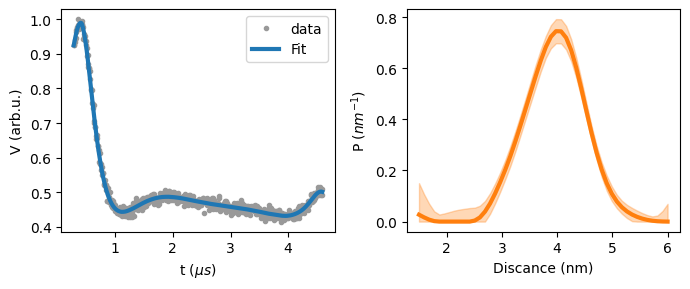

In [6]:
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
plt.plot(t,Vexp,'.',label='data',color='0.6')
plt.plot(t,Vfit,linewidth=3,color='C0',label='Fit')

plt.legend()
plt.xlabel('t ($\mu s$)')
plt.ylabel('V (arb.u.)')


plt.subplot(1,2,2)

# Plot the fitted distance distribution
plt.plot(r,P,linewidth=3,color='C1')
plt.fill_between(r,P95[:,0],P95[:,1],color='C1',alpha=0.3)
# Plot the confidence bands as a filled area
plt.xlabel('Discance (nm)')
plt.ylabel('P ($nm^{-1}$)')
# Add the axes labels
plt.tight_layout()
plt.savefig('plot_example.pdf')

### Exercise 2: 5pDEER with the compactness criterion and Gaussian fitting

|Parmaeter|value (us)|
|---------|----------|
|tau1|4.2|
|tau2|4.2|
|tau3|0.3|

**2.a: Loading data**
- Please load data from the "../Data/Exercise2.DTA"
- Please correct the phase
- Please normalise the data
- Please correct for deadtime (Here it was 300ns)

In [24]:
# Your solution goes here
t, V = dl.deerload('../data/Exercise2.DTA')
Vexp = dl.correctphase(V)
Vexp = Vexp/np.max(Vexp)

t = t-t[0]
t = t + 0.1
t

array([0.1  , 0.108, 0.116, ..., 8.684, 8.692, 8.7  ])

**2.b: Building the model**
- Define a r axis.
- Please create a 5pdeer experiment, with the correct tau values
- Create a single gaussian model with `dd_gauss`
- Use this experiment to build a dipola model
- Please print this model

In [25]:
# Your solution goes 
r = np.linspace(1.5,6,50)   # time axis, µs
experiment = dl.ex_fwd5pdeer(tau1=4.2,tau2=4.2,tau3=0.3, pathways=[1,2])
Pmodel = dl.dd_gauss
Vmodel = dl.dipolarmodel(t,r, experiment=experiment, Pmodel=Pmodel)
print(Vmodel)

Description: Forward 5-pulse DEER dipolar signal model
Signature: (lam1, reftime1, lam2, reftime2, conc, mean, std, scale)
Constants: []
Parameter Table: 
========== ======= ======= ======= ======== ======== ====== =============================== 
 Name       Lower   Start   Upper    Type    Frozen   Unit   Description                    
========== ======= ======= ======= ======== ======== ====== =============================== 
 lam1           0    0.01       1   nonlin     No            Amplitude of pathway #1        
 reftime1   0.252     0.3   0.348   nonlin     No      μs    Refocusing time of pathway #1  
 lam2           0    0.01       1   nonlin     No            Amplitude of pathway #2        
 reftime2    3.85     3.9    3.95   nonlin     No      μs    Refocusing time of pathway #2  
 conc        0.01      50   5e+03   nonlin     No      μM    Spin concentration             
 mean           1     3.5      20   nonlin     No      nm    Mean                           
 std    

**2.c: Create the compactness penalty**
- Use `dipolarpenalty` to build compactness penalty
    - remember to specify the type: `type='compactness'`
    - remember to include the Pmodel: `Pmodel=pmodel'`

In [22]:
# Your solution goes here
compactness = dl.dipolarpenalty(Pmodel=Pmodel, r=r, type='compactness')

**2.d: Fitting**
- Please fit your data
    - If you are using Binder please add these aditonal fitting arguments: `ftol=1e3` 
    - Remember to add the penalty `penalties=compactness`
- Print your results
- Plot the time domain, using the built in method

Goodness-of-fit: 
========= ============= ============= ===================== ======= 
 Dataset   Noise level   Reduced 𝛘2    Residual autocorr.    RMSD   
========= ============= ============= ===================== ======= 
   #1         0.010         0.948             0.045          0.010  
========= ============= ============= ===================== ======= 
Model hyperparameters: 
 Penalty weight #1  
       0.060        
Model parameters: 
=========== ========= ========================= ====== =============================== 
 Parameter   Value     95%-Confidence interval   Unit   Description                    
=========== ========= ========================= ====== =============================== 
 lam1        0.400     (0.399,0.402)                    Amplitude of pathway #1        
 reftime1    0.298     (0.295,0.300)              μs    Refocusing time of pathway #1  
 lam2        0.149     (0.147,0.152)                    Amplitude of pathway #2        
 reftime2    3.904     (

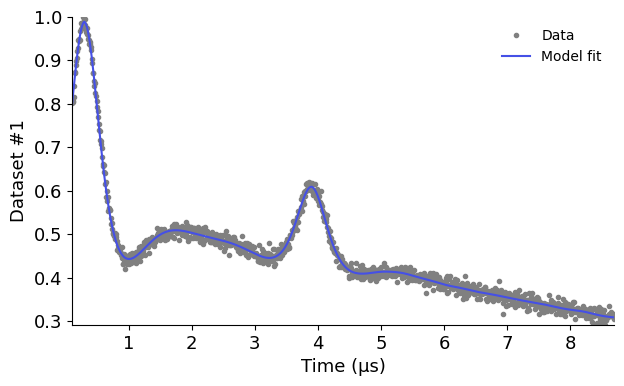

In [26]:
# Your solution goes here
results = dl.fit(Vmodel,Vexp, penalties=compactness)
print(results)
results.plot(axis=t,xlabel='Time (µs)');

**2.e: Extracting the distance distributions**
- Create a variable for the distance distribution, and one for its 95% confidence interval

In [28]:
# Your solution goes here
Vfit = results.model   # Fitted signal
P = results.evaluate(Pmodel,r)
Puncert = results.propagate(Pmodel,r, lb=np.zeros_like(r))
P95 = Puncert.ci(95)    # 95% confidence interval

**2.f: Plotting**
Modify the following script to plot your data.
- Give the plot a useful title
- Add the distance data to the plot, with uncertainty. 
- Add axes labels to the distance domain
- Save the figure

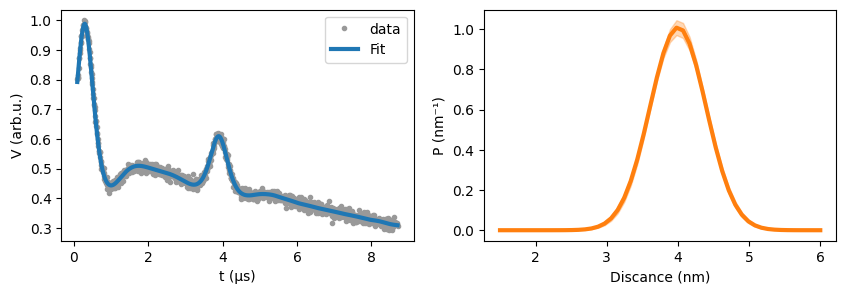

In [29]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.plot(t,Vexp,'.',label='data',color='0.6')
plt.plot(t,Vfit,linewidth=3,color='C0',label='Fit')

plt.legend()
plt.xlabel('t (µs)')
plt.ylabel('V (arb.u.)')


plt.subplot(1,2,2)

# Plot the fitted distance distribution
plt.plot(r,P,linewidth=3,color='C1')
plt.fill_between(r,P95[:,0],P95[:,1],color='C1',alpha=0.3)
# Plot the confidence bands as a filled area
plt.xlabel('Discance (nm)')
plt.ylabel('P (nm⁻¹)')
# Add the axes labels
plt.show()